## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  36.533289  1168.812956  0.827771  3.934446  968.160656
1  73.005166   174.536035  0.904017  3.947732  174.013720
2  32.567045  1375.423625  0.584818  4.690967  805.082224
3  72.883588   359.015423  0.480048  9.118578  187.214418
4  17.245828   241.339058  0.597668  6.044989  145.262254


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0638893	total: 58ms	remaining: 57.9s
1:	learn: 1.0521684	total: 58.4ms	remaining: 29.1s
2:	learn: 1.0392266	total: 58.9ms	remaining: 19.6s
3:	learn: 1.0248899	total: 59.5ms	remaining: 14.8s
4:	learn: 1.0084055	total: 60.1ms	remaining: 11.9s
5:	learn: 0.9970618	total: 60.5ms	remaining: 10s
6:	learn: 0.9813269	total: 61ms	remaining: 8.65s
7:	learn: 0.9666380	total: 61.5ms	remaining: 7.62s
8:	learn: 0.9550359	total: 61.9ms	remaining: 6.82s
9:	learn: 0.9410018	total: 62.4ms	remaining: 6.18s
10:	learn: 0.9298691	total: 62.9ms	remaining: 5.65s
11:	learn: 0.9163167	total: 64ms	remaining: 5.27s
12:	learn: 0.9053828	total: 64.5ms	remaining: 4.89s
13:	learn: 0.8913153	total: 64.9ms	remaining: 4.57s
14:	learn: 0.8772980	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8661999	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8530082	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8409119	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8313030	total: 66.9ms	remaining: 3.45s


103:	learn: 0.2865421	total: 107ms	remaining: 924ms
104:	learn: 0.2828000	total: 108ms	remaining: 918ms
105:	learn: 0.2791114	total: 108ms	remaining: 912ms
106:	learn: 0.2757644	total: 109ms	remaining: 906ms
107:	learn: 0.2721297	total: 109ms	remaining: 900ms
108:	learn: 0.2688331	total: 109ms	remaining: 894ms
109:	learn: 0.2653762	total: 110ms	remaining: 888ms
110:	learn: 0.2629578	total: 110ms	remaining: 882ms
111:	learn: 0.2596841	total: 110ms	remaining: 874ms
112:	learn: 0.2556870	total: 110ms	remaining: 867ms
113:	learn: 0.2531969	total: 111ms	remaining: 862ms
114:	learn: 0.2502065	total: 111ms	remaining: 858ms
115:	learn: 0.2471855	total: 112ms	remaining: 852ms
116:	learn: 0.2454563	total: 112ms	remaining: 847ms
117:	learn: 0.2426480	total: 113ms	remaining: 842ms
118:	learn: 0.2396995	total: 113ms	remaining: 836ms
119:	learn: 0.2367853	total: 113ms	remaining: 831ms
120:	learn: 0.2342076	total: 114ms	remaining: 825ms
121:	learn: 0.2315162	total: 114ms	remaining: 820ms
122:	learn: 

279:	learn: 0.0547958	total: 186ms	remaining: 477ms
280:	learn: 0.0544249	total: 186ms	remaining: 476ms
281:	learn: 0.0540626	total: 186ms	remaining: 475ms
282:	learn: 0.0537311	total: 187ms	remaining: 473ms
283:	learn: 0.0534328	total: 187ms	remaining: 472ms
284:	learn: 0.0531697	total: 188ms	remaining: 471ms
285:	learn: 0.0528861	total: 188ms	remaining: 469ms
286:	learn: 0.0525643	total: 188ms	remaining: 468ms
287:	learn: 0.0522712	total: 189ms	remaining: 466ms
288:	learn: 0.0519587	total: 197ms	remaining: 484ms
289:	learn: 0.0516615	total: 197ms	remaining: 482ms
290:	learn: 0.0513767	total: 197ms	remaining: 481ms
291:	learn: 0.0510790	total: 198ms	remaining: 480ms
292:	learn: 0.0508279	total: 198ms	remaining: 479ms
293:	learn: 0.0505399	total: 199ms	remaining: 477ms
294:	learn: 0.0502159	total: 199ms	remaining: 476ms
295:	learn: 0.0499775	total: 199ms	remaining: 474ms
296:	learn: 0.0497492	total: 200ms	remaining: 473ms
297:	learn: 0.0494172	total: 200ms	remaining: 472ms
298:	learn: 

505:	learn: 0.0174889	total: 288ms	remaining: 281ms
506:	learn: 0.0174103	total: 289ms	remaining: 281ms
507:	learn: 0.0173815	total: 289ms	remaining: 280ms
508:	learn: 0.0173544	total: 289ms	remaining: 279ms
509:	learn: 0.0173262	total: 290ms	remaining: 278ms
510:	learn: 0.0172997	total: 290ms	remaining: 278ms
511:	learn: 0.0172179	total: 291ms	remaining: 277ms
512:	learn: 0.0171920	total: 291ms	remaining: 276ms
513:	learn: 0.0171347	total: 292ms	remaining: 276ms
514:	learn: 0.0170498	total: 292ms	remaining: 275ms
515:	learn: 0.0169714	total: 293ms	remaining: 274ms
516:	learn: 0.0168826	total: 293ms	remaining: 274ms
517:	learn: 0.0168129	total: 294ms	remaining: 273ms
518:	learn: 0.0167371	total: 294ms	remaining: 273ms
519:	learn: 0.0166532	total: 295ms	remaining: 272ms
520:	learn: 0.0165855	total: 295ms	remaining: 271ms
521:	learn: 0.0165460	total: 296ms	remaining: 271ms
522:	learn: 0.0164781	total: 296ms	remaining: 270ms
523:	learn: 0.0164114	total: 296ms	remaining: 269ms
524:	learn: 

687:	learn: 0.0092786	total: 366ms	remaining: 166ms
688:	learn: 0.0092578	total: 366ms	remaining: 165ms
689:	learn: 0.0092436	total: 367ms	remaining: 165ms
690:	learn: 0.0092100	total: 367ms	remaining: 164ms
691:	learn: 0.0091959	total: 367ms	remaining: 164ms
692:	learn: 0.0091486	total: 368ms	remaining: 163ms
693:	learn: 0.0091156	total: 368ms	remaining: 162ms
694:	learn: 0.0090770	total: 369ms	remaining: 162ms
695:	learn: 0.0090657	total: 369ms	remaining: 161ms
696:	learn: 0.0090336	total: 370ms	remaining: 161ms
697:	learn: 0.0089958	total: 370ms	remaining: 160ms
698:	learn: 0.0089848	total: 371ms	remaining: 160ms
699:	learn: 0.0089714	total: 371ms	remaining: 159ms
700:	learn: 0.0089414	total: 371ms	remaining: 158ms
701:	learn: 0.0089044	total: 372ms	remaining: 158ms
702:	learn: 0.0088679	total: 372ms	remaining: 157ms
703:	learn: 0.0088587	total: 373ms	remaining: 157ms
704:	learn: 0.0088211	total: 373ms	remaining: 156ms
705:	learn: 0.0087844	total: 374ms	remaining: 156ms
706:	learn: 

924:	learn: 0.0051874	total: 470ms	remaining: 38.1ms
925:	learn: 0.0051681	total: 470ms	remaining: 37.6ms
926:	learn: 0.0051598	total: 471ms	remaining: 37.1ms
927:	learn: 0.0051523	total: 471ms	remaining: 36.5ms
928:	learn: 0.0051441	total: 472ms	remaining: 36ms
929:	learn: 0.0051251	total: 472ms	remaining: 35.5ms
930:	learn: 0.0051170	total: 473ms	remaining: 35ms
931:	learn: 0.0051097	total: 473ms	remaining: 34.5ms
932:	learn: 0.0050909	total: 473ms	remaining: 34ms
933:	learn: 0.0050829	total: 474ms	remaining: 33.5ms
934:	learn: 0.0050786	total: 474ms	remaining: 32.9ms
935:	learn: 0.0050714	total: 474ms	remaining: 32.4ms
936:	learn: 0.0050635	total: 475ms	remaining: 31.9ms
937:	learn: 0.0050356	total: 475ms	remaining: 31.4ms
938:	learn: 0.0050245	total: 475ms	remaining: 30.9ms
939:	learn: 0.0050174	total: 475ms	remaining: 30.4ms
940:	learn: 0.0050135	total: 476ms	remaining: 29.8ms
941:	learn: 0.0050099	total: 476ms	remaining: 29.3ms
942:	learn: 0.0049991	total: 476ms	remaining: 28.8ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

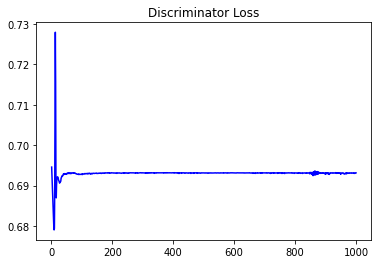

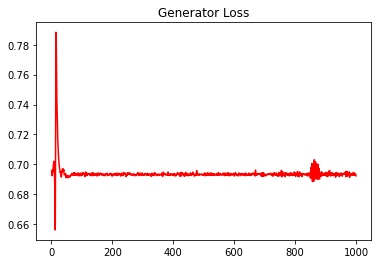

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.0054224652830620335


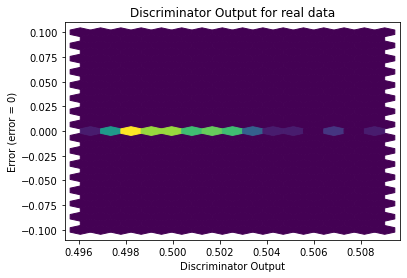

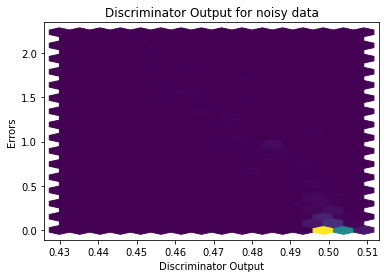

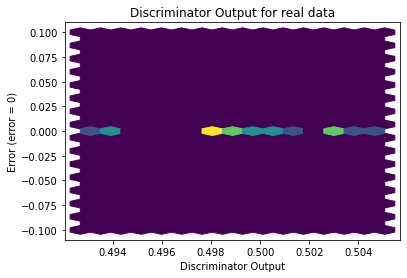

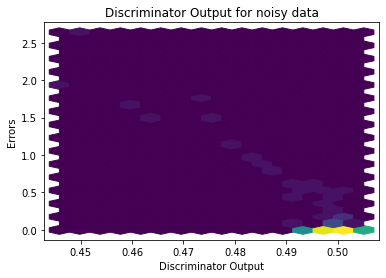

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


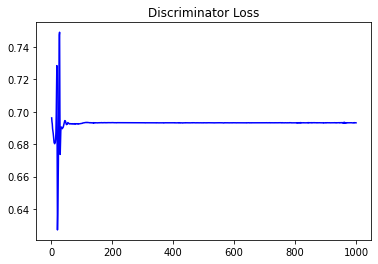

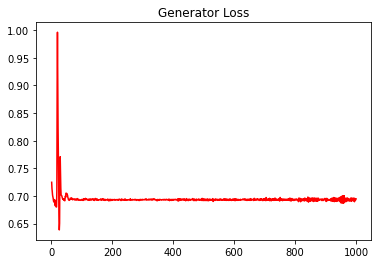

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.011015073377572888


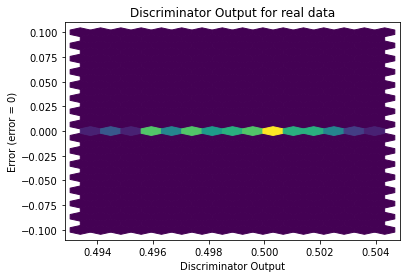

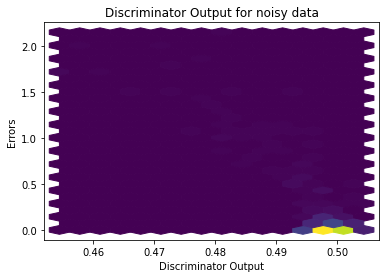

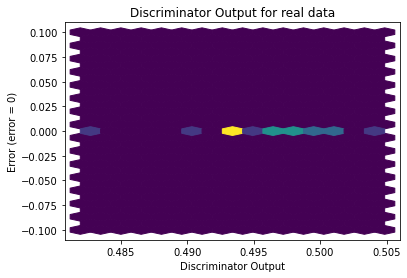

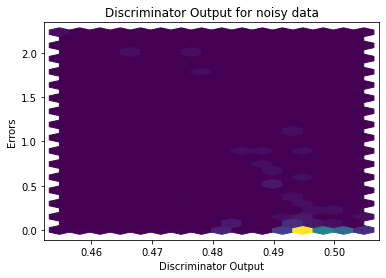

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7305]], requires_grad=True)
